## Prueba Gravitacion
fabian trigo


# Graficar Potencial Efectivo

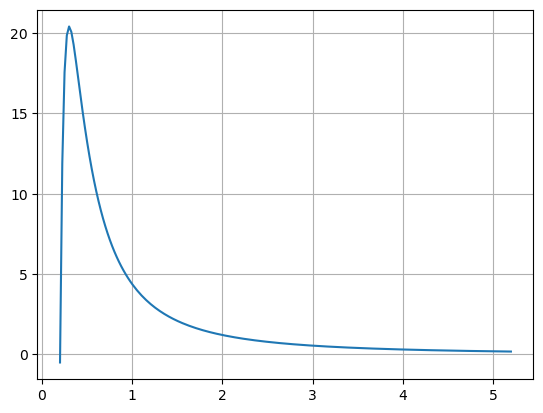

In [17]:
G = 1
c = 1
M = 0.1
r_s = 2 * G * M / c**2

# en el papel se determino que L debe ser mayor
# que r_s * c * sqrt(3)
# para que existan orbitas estables
L0 = r_s * c * np.sqrt(3)
L = L0 + 3

def Veff(r,L):
    return -G*M/r + L**2 / (2 * r**2) - L**2 * G * M  / (c**2 * r**3)


r = np.linspace(r_s, r_s+5, 200)
plt.grid()
plt.plot(r, Veff(r,L))
plt.show()

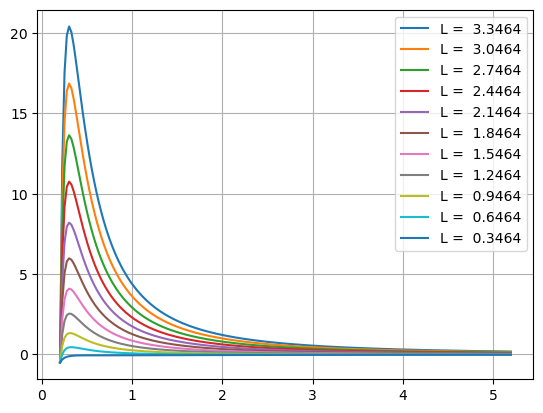

In [27]:
# veamos que ocurre con distintos L
r = np.linspace(r_s, r_s+5, 200)
plt.grid()
# valores de L0 + 0 , ..., L0 + 3
for L in [L0 + 3 - 0.3 * i for i in range(0,11)]:
    plt.plot(r, Veff(r,L), label=f"L = {L : .4f}")
plt.legend()
plt.show()

# Graficar Orbitas Relativistas

Para resolver se usa el metodo de Heun:

Tengamos una derivada:
$$
\frac{d y}{dt} = f(t,y)
$$

Usamos un valor intermedio
$$
\hat y_{i+1} = y_i + h f(t_i, y_i)
$$

El siguiente paso sera el un promedio entre el paso real y el intermedio
$$
y_{i+1} = y_i + \frac{h}{2} [ f(t_i, y_i) + f(t_{i+1},\hat y_{i+1}) ]
$$

Se llego a la ecuación:
$u = 1/r$

$$
\frac{d^2 u}{d \phi^2} = \frac{\beta}{2 b^2} - u + \frac{3}{2} r_s u^2
$$
- $\beta = \frac{c^2 r_s}{E^2}$
- $b = \frac{L}{E}$

reescribiendola sin las variables intermedias
$$
\frac{d^2 u}{d \phi^2} = \frac{c^2 r_s}{2 L^2} - u + \frac{3}{2} r_s u^2
$$

en este desarrollo definimos
$$
u_\text{dot} = \dot u = \frac{du}{d\phi}
$$


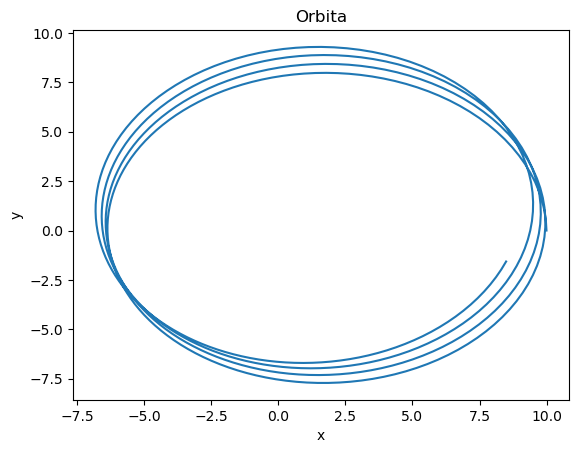

In [12]:
import numpy as np
import matplotlib.pyplot as plt


def f1(phi, u): # derivada de d^2u/dphi^2
    result = (c**2 * r_s / (2 * L*L) - u + (3/2)* r_s * u**2)
    return result

def f2(phi, udot): # derivada du/dphi
    # notemos que devolvermos udot como tal
    result = udot
    return result

def integration_heun(N, G, M, L, E, u0, udot0, phi0, dphi):
    """
    resuelve u=1/r
    """

    

    # definimos los estados iniciales
    # 
    phi = phi0
    u = u0 # 1/r inicial
    udot = udot0 # d/dtau u
    # luego podemos devolver el cambio
    r = 1/u

    # coord X,Y para graficar
    x = r * np.cos(phi)
    y = r * np.sin(phi)
    t = 0
    tau = 0

    # guardamos los datos
    x_arr = np.zeros(N)
    y_arr = np.zeros(N)

    r_arr = np.zeros(N)
    vel_arr = np.zeros(N)
    phi_arr = np.zeros(N)
    t_arr = np.zeros(N)
    tau_arr = np.zeros(N)

    # Evolucionar orbita
    for i in range(N):
        # Avanzar pasos
        u_o = u
        udot_o = udot
        h = dphi

        # Integration using the method of Heun
        # intermediate value
        udot_hat = udot_o + h*f1(phi, u_o)
        # then we computa y_i+1
        u = u_o + 0.5*h*(f2(phi, udot_o) + f2(phi, udot_hat))

        # intermediate value
        u_hat = u_o + h*f2(phi, udot_o)
        
        # compute the speed
        udot = udot_o + 0.5*h*(f1(phi, u_o) + f1(phi, u_hat))

        # coordenadas radiales
        r = 1/u # r
        vel = - 1 / (u**2) * udot #dr/dphi

        # Compute time coordinate, with the schw. metric
        d_tau = r * r * dphi / L
        dt = E * d_tau / (1.0 - 2 * G * M / r)

        t = t + dt
        tau = tau + d_tau

        # Compute Cartesian coordinates
        x = r * np.cos(phi)
        y = r * np.sin(phi)

        # Save position data
        x_arr[i] = x
        y_arr[i] = y
        t_arr[i] = t
        tau_arr[i] = tau
        vel_arr[i] = vel

        r_arr[i] = r
        phi_arr[i] = phi

        # Update angle
        phi = phi + dphi

    # Plot results
    plt.plot(x_arr, y_arr)
    plt.title("Orbita")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()

    return t_arr, tau_arr, r_arr, vel_arr, phi_arr



# Parameters

G = 1.0         # G
c = 1           #



# Condiciones inciiales controlables
# se recomienda comenzar cambiando N
# y ver como evoluciona en mayor tiempo

N = 500         # Pasos totales Simulacion
phi0 = 0        # angulo incial
dphi = 0.05     # step

M = 0.1         # Masa
L = 0.9         # Momentum Angular
E = 0.9         # Energy of orbiting object


# radio inciail
r0 = 10
udot0 = 0.0       # derivada inicial, osea du/dphi

u0 = 1 / r0  


# definimos constantes importantes
r_s = 2 * G * M / c**2

    
t, tau, r, rvel, phi = integration_heun(N, G, M, L, E, u0, udot0, phi0, dphi)
